In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Project
## Competitive Result Analysis 

In [36]:
df=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Datasets\SSC Result Trends in Bangladesh (20012025).csv")

# Data Info

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             25 non-null     int64 
 1   Total_Examinees  25 non-null     object
 2   Pass_Rate        25 non-null     object
 3   GPA_5_Count      25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [38]:
df.shape

(25, 4)

In [39]:
df.head()

,Year,Total_Examinees,Pass_Rate,GPA_5_Count
0,2001,Null,35.22%,76
1,2002,"7,84,815",42.18%,327
2,2003,"921,024",36.85%,"1,389"
3,2004,"756,387",50.27%,"8,597"
4,2005,"944,015",54.10%,"15,631"


# Data Handling & Cleaning

In [40]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [41]:
df = df[df["Total_Examinees"] != "Null"]

In [42]:
df["Total_Examinees"] = df["Total_Examinees"].str.replace(",", "")
df["Total_Examinees"] = df["Total_Examinees"].astype(int)

In [43]:
df.head()

,Year,Total_Examinees,Pass_Rate,GPA_5_Count
1,2002,784815,42.18%,327
2,2003,921024,36.85%,"1,389"
3,2004,756387,50.27%,"8,597"
4,2005,944015,54.10%,"15,631"
5,2006,1000564,62.22%,"24,384"


In [44]:

# Clean and convert Pass_Rate
df["Pass_Rate"] = df["Pass_Rate"].str.replace("%", "", regex=False).astype(float).astype(int)

# Clean and convert GPA_5_Count
df["GPA_5_Count"] = df["GPA_5_Count"].str.replace(",", "", regex=False).astype(int)

In [45]:
df.rename(columns={"Pass_Rate":"Pass_Rate(Percentage)"},inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1 to 24
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Year                   24 non-null     int64
 1   Total_Examinees        24 non-null     int64
 2   Pass_Rate(Percentage)  24 non-null     int64
 3   GPA_5_Count            24 non-null     int64
dtypes: int64(4)
memory usage: 960.0 bytes


In [47]:
df.head()

,Year,Total_Examinees,Pass_Rate(Percentage),GPA_5_Count
1,2002,784815,42,327
2,2003,921024,36,1389
3,2004,756387,50,8597
4,2005,944015,54,15631
5,2006,1000564,62,24384


# EDA & Visualization

In [48]:
import plotly.express as px

fig = px.line(df, x="Year", y="Total_Examinees", markers=True,
              title="Total Examinees Over the Years")
fig.show()


In [49]:
fig = px.line(df, x="Year", y=["Total_Examinees", "Pass_Rate(Percentage)", "GPA_5_Count"],
              title="Exam Trends Over Time")
fig.update_traces(mode="lines+markers")
fig.show()


In [50]:
fig = px.scatter(df, x="Total_Examinees", y="GPA_5_Count",
                 size="Pass_Rate(Percentage)", color="Year",
                 title="GPA vs Examinees with Pass Rate Bubble Size")
fig.show()


In [51]:
fig = px.bar(df, x="Year", y="Pass_Rate(Percentage)",
             title="Pass Rate by Year", text="Pass_Rate(Percentage)")
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.show()


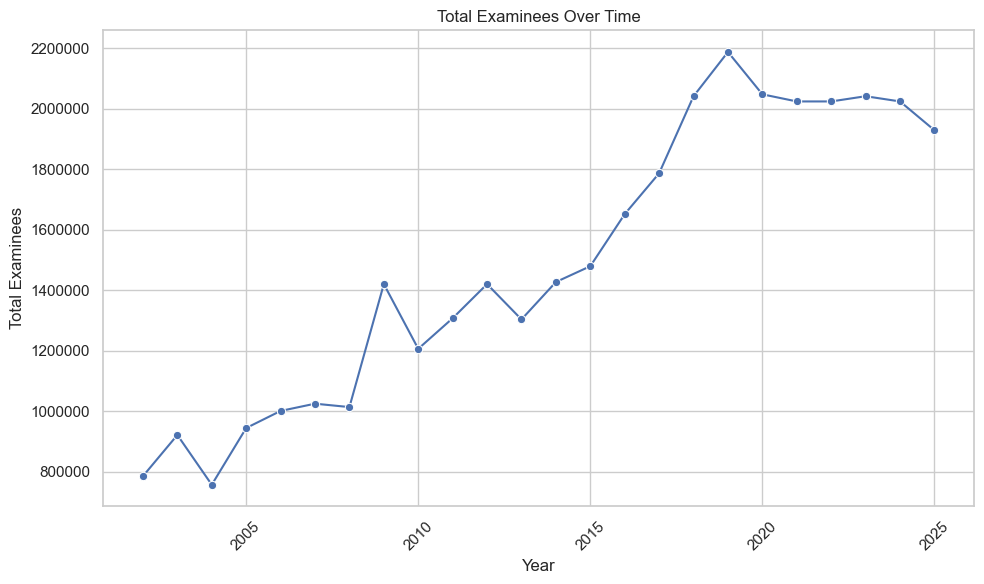

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Year", y="Total_Examinees", marker="o")
plt.title("Total Examinees Over Time")
plt.xlabel("Year")
plt.ylabel("Total Examinees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


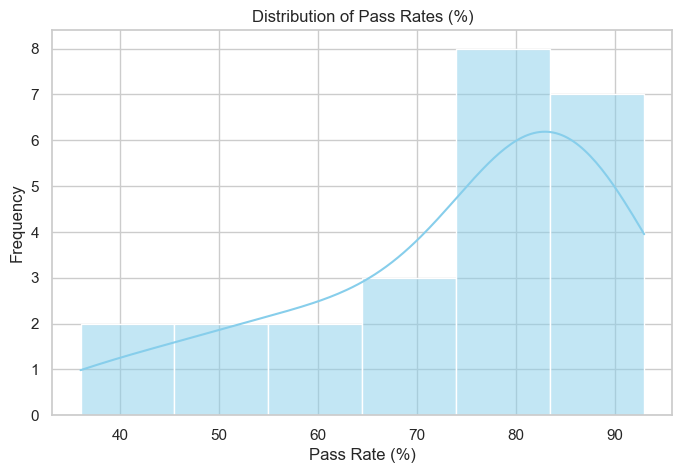

In [55]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Pass_Rate(Percentage)"], kde=True, color="skyblue")
plt.title("Distribution of Pass Rates (%)")
plt.xlabel("Pass Rate (%)")
plt.ylabel("Frequency")
plt.show()


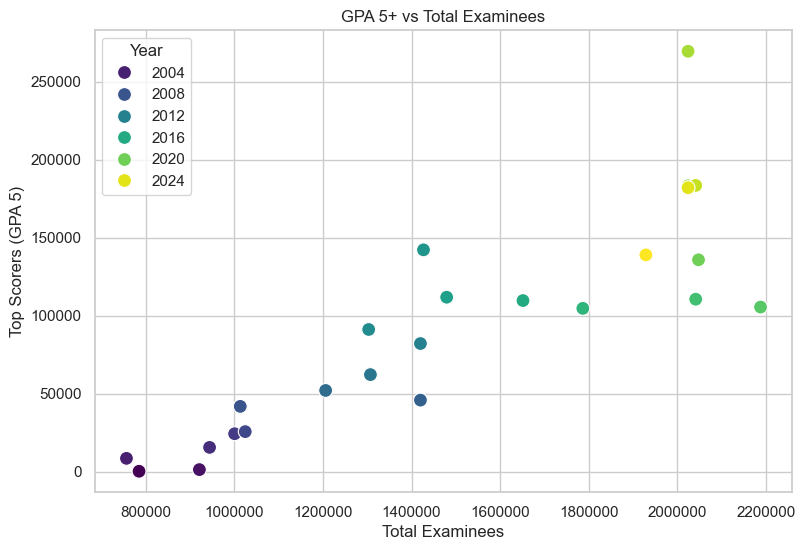

In [56]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x="Total_Examinees", y="GPA_5_Count", hue="Year", palette="viridis", s=100)
plt.title("GPA 5+ vs Total Examinees")
plt.xlabel("Total Examinees")
plt.ylabel("Top Scorers (GPA 5)")
plt.show()
